In [87]:
# Import the pandas library
import pandas as pd

# Read the CSV file
file_path = 'Waste_Collection___Diversion_Report__daily__20241210.csv'
data = pd.read_csv(file_path)

data = data.drop(columns=["Route Number", "Load ID"])

# Display the first few rows of the updated DataFrame
data.head()

,Report Date,Load Type,Load Time,Load Weight,Dropoff Site,Route Type
0,12/08/2020,BULK,12/08/2020 03:02:00 PM,5220.0,TDS LANDFILL,BULK
1,12/08/2020,RECYCLING - SINGLE STREAM,12/08/2020 10:00:00 AM,11140.0,TDS - MRF,RECYCLING - SINGLE STREAM
2,12/03/2020,RECYCLING - SINGLE STREAM,12/03/2020 10:34:00 AM,10060.0,BALCONES RECYCLING,RECYCLING - SINGLE STREAM
3,04/09/2021,GARBAGE COLLECTIONS,04/09/2021 03:22:00 PM,25500.0,TDS LANDFILL,GARBAGE COLLECTION
4,12/07/2020,SWEEPING,12/07/2020 10:15:00 AM,7100.0,TDS LANDFILL,SWEEPER DUMPSITES


In [88]:
print(data.columns)

Index(['Report Date', 'Load Type', 'Load Time', 'Load Weight', 'Dropoff Site',
       'Route Type'],
      dtype='object')


In [89]:
# Print all the unique values in the "Dropoff Site" column
unique_dropoff_sites = data["Dropoff Site"].unique()
print(unique_dropoff_sites)

['TDS LANDFILL' 'TDS - MRF' 'BALCONES RECYCLING' 'HORNSBY BEND'
 'ORGANICS BY GOSH' 'ONION CREEK' 'AUSTIN IRON AND METAL' 'MRF'
 'BALCONES WOODS' 'GREAT NORTHERN' 'ON ROUTE HIGH DUMP' 'PARK CENTER'
 'STEINER LANDFILL' 'COMMERCIAL METALS' 'WILCAB' 'AUSTIN WOOD RECYCLING'
 'WESTFIELD' 'PARK BEND' 'ST. EDWARDS' 'ZILKER' 'BURGER CENTER'
 'WINNEBAGO' 'ELMONT' 'BRAKER SITE' 'CROSS PARK' 'BFI LANDFILL'
 'BARTON SKYWAY' 'CLARKSON' 'PEASE PARK' 'KRAMER' 'INSPIRATION/GUNNISAN'
 'CYCLED PLASTICS LTD' 'LITTER DROPOFF' 'DEEP EDDY PARK']


In [90]:
# Filter the data for specific Dropoff Sites
data = data[data["Dropoff Site"].isin([
    "BALCONES RECYCLING", 
    "BALCONES WOODS", 
    "BURGER CENTER", 
    "ELMONT", 
    "HORNSBY BEND", 
    "TDS LANDFILL"
])]

# Display the first few rows of the filtered DataFrame
data.head()

,Report Date,Load Type,Load Time,Load Weight,Dropoff Site,Route Type
0,12/08/2020,BULK,12/08/2020 03:02:00 PM,5220.0,TDS LANDFILL,BULK
2,12/03/2020,RECYCLING - SINGLE STREAM,12/03/2020 10:34:00 AM,10060.0,BALCONES RECYCLING,RECYCLING - SINGLE STREAM
3,04/09/2021,GARBAGE COLLECTIONS,04/09/2021 03:22:00 PM,25500.0,TDS LANDFILL,GARBAGE COLLECTION
4,12/07/2020,SWEEPING,12/07/2020 10:15:00 AM,7100.0,TDS LANDFILL,SWEEPER DUMPSITES
6,12/04/2020,GARBAGE COLLECTIONS,12/04/2020 01:01:00 PM,22720.0,TDS LANDFILL,GARBAGE COLLECTION


In [91]:
data["Report Date"] = pd.to_datetime(data["Report Date"], format="%m/%d/%Y")

# Filter the data for the date range between 01/01/2020 and 12/30/2020
start_date = "2020-01-01"
end_date = "2020-12-30"
data = data[(data["Report Date"] >= start_date) & (data["Report Date"] <= end_date)]

# Display the first few rows of the filtered DataFrame
data.head()

print(len(data))

30080


In [92]:
import pandas as pd

# Read the CSV files into separate DataFrames
df1 = pd.read_csv('weather/Balcones.csv')
df2 = pd.read_csv('weather/BURGER_CENTER.csv')
df3 = pd.read_csv('weather/ELMONT.csv')
df4 = pd.read_csv('weather/Hornsby_Bend.csv')
df5 = pd.read_csv('weather/TDS Landfill.csv')

# Concatenate all the DataFrames into a single DataFrame
merged_data = pd.concat([df1, df2, df3, df4, df5])

# Save the concatenated DataFrame to a new CSV file
merged_data.to_csv('weather/merged_weather_data.csv', index=False)

In [93]:
merged_data.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,9301 Johnny Morris Road Austin,2020-01-01,56.1,49.4,53.2,56.1,49.4,53.2,35.9,53.0,...,2.5,2,NaN,2020-01-01T07:27:12,2020-01-01T17:40:50,0.21,Overcast,Cloudy skies throughout the day.,cloudy,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,E..."
1,9301 Johnny Morris Road Austin,2020-01-02,59.7,47.3,53.6,59.7,47.3,53.5,50.0,87.6,...,2.3,1,NaN,2020-01-02T07:27:26,2020-01-02T17:41:33,0.25,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"KATT,72064800230,KAUS,E4737,KEDC,72254013904,E..."
2,9301 Johnny Morris Road Austin,2020-01-03,63.7,45.8,54.0,63.7,44.8,53.5,41.0,64.8,...,12.3,6,NaN,2020-01-03T07:27:38,2020-01-03T17:42:17,0.27,Clear,Clear conditions throughout the day.,clear-day,"KATT,72064800230,KAUS,C6155,KEDC,72254013904,E..."
3,9301 Johnny Morris Road Austin,2020-01-04,70.6,37.9,54.2,70.6,37.9,53.6,30.3,43.0,...,13.0,6,NaN,2020-01-04T07:27:48,2020-01-04T17:43:01,0.31,Clear,Clear conditions throughout the day.,clear-day,"KATT,72064800230,KAUS,C6155,KEDC,72254013904,E..."
4,9301 Johnny Morris Road Austin,2020-01-05,73.9,44.0,57.5,73.9,41.0,56.5,33.2,42.2,...,13.1,6,NaN,2020-01-05T07:27:57,2020-01-05T17:43:47,0.34,Clear,Clear conditions throughout the day.,clear-day,"KATT,72064800230,KAUS,C6155,KEDC,72254013904,E..."


In [94]:
unique_dropoff_sites = merged_data["name"].unique()
print(unique_dropoff_sites)

['9301 Johnny Morris Road Austin' '3200 Jones Rd, Austin, TX 78745'
 '4600 Elmont Dr Austin, TX 78741' '2210 FM 973, Austin, TX 78725'
 '12200 Carl Rd, Creedmoor, TX 78610']


In [95]:
# Create a mapping dictionary for the 'name' to 'location'
location_mapping = {
    '9301 Johnny Morris Road Austin': 'BALCONES RECYCLING',
    '3200 Jones Rd, Austin, TX 78745': 'BURGER CENTER',
    '4600 Elmont Dr Austin, TX 78741': 'ELMONT',
    '2210 FM 973, Austin, TX 78725': 'HORNSBY BEND',
    '12200 Carl Rd, Creedmoor, TX 78610': 'TDS LANDFILL'
}

# Add a new column 'location' to the merged_data DataFrame by mapping the 'name' column
merged_data['location'] = merged_data['name'].map(location_mapping)

# Display the first few rows of the updated DataFrame
merged_data.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,location
0,9301 Johnny Morris Road Austin,2020-01-01,56.1,49.4,53.2,56.1,49.4,53.2,35.9,53.0,...,2,NaN,2020-01-01T07:27:12,2020-01-01T17:40:50,0.21,Overcast,Cloudy skies throughout the day.,cloudy,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,E...",BALCONES RECYCLING
1,9301 Johnny Morris Road Austin,2020-01-02,59.7,47.3,53.6,59.7,47.3,53.5,50.0,87.6,...,1,NaN,2020-01-02T07:27:26,2020-01-02T17:41:33,0.25,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"KATT,72064800230,KAUS,E4737,KEDC,72254013904,E...",BALCONES RECYCLING
2,9301 Johnny Morris Road Austin,2020-01-03,63.7,45.8,54.0,63.7,44.8,53.5,41.0,64.8,...,6,NaN,2020-01-03T07:27:38,2020-01-03T17:42:17,0.27,Clear,Clear conditions throughout the day.,clear-day,"KATT,72064800230,KAUS,C6155,KEDC,72254013904,E...",BALCONES RECYCLING
3,9301 Johnny Morris Road Austin,2020-01-04,70.6,37.9,54.2,70.6,37.9,53.6,30.3,43.0,...,6,NaN,2020-01-04T07:27:48,2020-01-04T17:43:01,0.31,Clear,Clear conditions throughout the day.,clear-day,"KATT,72064800230,KAUS,C6155,KEDC,72254013904,E...",BALCONES RECYCLING
4,9301 Johnny Morris Road Austin,2020-01-05,73.9,44.0,57.5,73.9,41.0,56.5,33.2,42.2,...,6,NaN,2020-01-05T07:27:57,2020-01-05T17:43:47,0.34,Clear,Clear conditions throughout the day.,clear-day,"KATT,72064800230,KAUS,C6155,KEDC,72254013904,E...",BALCONES RECYCLING


In [96]:
# Save the concatenated DataFrame to a new CSV file
# Convert the 'datetime' column to mm/dd/yyyy format
merged_data['datetime'] = pd.to_datetime(merged_data['datetime']).dt.strftime('%m/%d/%Y')

# merged_data['datetime'] = pd.to_datetime(merged_data["datetime"], format="%m/%d/%Y")
merged_data.to_csv('weather/merged_weather_data.csv', index=False)
merged_data.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,location
0,9301 Johnny Morris Road Austin,01/01/2020,56.1,49.4,53.2,56.1,49.4,53.2,35.9,53.0,...,2,NaN,2020-01-01T07:27:12,2020-01-01T17:40:50,0.21,Overcast,Cloudy skies throughout the day.,cloudy,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,E...",BALCONES RECYCLING
1,9301 Johnny Morris Road Austin,01/02/2020,59.7,47.3,53.6,59.7,47.3,53.5,50.0,87.6,...,1,NaN,2020-01-02T07:27:26,2020-01-02T17:41:33,0.25,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"KATT,72064800230,KAUS,E4737,KEDC,72254013904,E...",BALCONES RECYCLING
2,9301 Johnny Morris Road Austin,01/03/2020,63.7,45.8,54.0,63.7,44.8,53.5,41.0,64.8,...,6,NaN,2020-01-03T07:27:38,2020-01-03T17:42:17,0.27,Clear,Clear conditions throughout the day.,clear-day,"KATT,72064800230,KAUS,C6155,KEDC,72254013904,E...",BALCONES RECYCLING
3,9301 Johnny Morris Road Austin,01/04/2020,70.6,37.9,54.2,70.6,37.9,53.6,30.3,43.0,...,6,NaN,2020-01-04T07:27:48,2020-01-04T17:43:01,0.31,Clear,Clear conditions throughout the day.,clear-day,"KATT,72064800230,KAUS,C6155,KEDC,72254013904,E...",BALCONES RECYCLING
4,9301 Johnny Morris Road Austin,01/05/2020,73.9,44.0,57.5,73.9,41.0,56.5,33.2,42.2,...,6,NaN,2020-01-05T07:27:57,2020-01-05T17:43:47,0.34,Clear,Clear conditions throughout the day.,clear-day,"KATT,72064800230,KAUS,C6155,KEDC,72254013904,E...",BALCONES RECYCLING


In [97]:
# Display the columns of the merged_data DataFrame
print(merged_data.columns)

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'location'],
      dtype='object')


In [98]:
# merged_data['datetime'] = pd.to_datetime(merged_data['datetime']).dt.strftime('%m/%d/%Y')
data["Report Date"] = pd.to_datetime(data["Report Date"]).dt.strftime('%m/%d/%Y')

In [99]:
# Merge the data and merged_data DataFrames based on 'Dropoff Site' and 'Report Date'
merged_data['datetime'] = pd.to_datetime(merged_data['datetime']).dt.strftime('%m/%d/%Y')


merged_result = pd.merge(data, merged_data, left_on=['Dropoff Site', 'Report Date'], right_on=['location', 'datetime'], how='left')

# Select the relevant columns and add 'conditions' to the data DataFrame
data['conditions'] = merged_result['conditions']

# Display the first few rows of the updated data DataFrame
data.head()

,Report Date,Load Type,Load Time,Load Weight,Dropoff Site,Route Type,conditions
0,12/08/2020,BULK,12/08/2020 03:02:00 PM,5220.0,TDS LANDFILL,BULK,NaN
2,12/03/2020,RECYCLING - SINGLE STREAM,12/03/2020 10:34:00 AM,10060.0,BALCONES RECYCLING,RECYCLING - SINGLE STREAM,NaN
4,12/07/2020,SWEEPING,12/07/2020 10:15:00 AM,7100.0,TDS LANDFILL,SWEEPER DUMPSITES,NaN
6,12/04/2020,GARBAGE COLLECTIONS,12/04/2020 01:01:00 PM,22720.0,TDS LANDFILL,GARBAGE COLLECTION,NaN
7,12/08/2020,BULK,12/08/2020 12:37:00 PM,7700.0,TDS LANDFILL,BULK,NaN


In [100]:

print(data["conditions"].unique())

[nan 'Partially cloudy' 'Rain, Overcast' 'Rain, Partially cloudy' 'Clear'
 'Snow, Rain, Overcast' 'Snow, Rain, Partially cloudy' 'Overcast'
 'Snow, Rain']


In [101]:
import numpy as np

# List of possible values to fill NaN
possible_conditions = ['Partially cloudy', 'Rain, Overcast', 'Rain, Partially cloudy', 'Clear',
                       'Snow, Rain, Overcast', 'Snow, Rain, Partially cloudy', 'Overcast', 'Snow, Rain']

# Replace NaN values in 'conditions' with random values from the list
data['conditions'] = data['conditions'].apply(lambda x: np.random.choice(possible_conditions) if pd.isna(x) else x)

# Display the first few rows of the updated DataFrame
data.head()

,Report Date,Load Type,Load Time,Load Weight,Dropoff Site,Route Type,conditions
0,12/08/2020,BULK,12/08/2020 03:02:00 PM,5220.0,TDS LANDFILL,BULK,Overcast
2,12/03/2020,RECYCLING - SINGLE STREAM,12/03/2020 10:34:00 AM,10060.0,BALCONES RECYCLING,RECYCLING - SINGLE STREAM,Partially cloudy
4,12/07/2020,SWEEPING,12/07/2020 10:15:00 AM,7100.0,TDS LANDFILL,SWEEPER DUMPSITES,Clear
6,12/04/2020,GARBAGE COLLECTIONS,12/04/2020 01:01:00 PM,22720.0,TDS LANDFILL,GARBAGE COLLECTION,"Snow, Rain, Partially cloudy"
7,12/08/2020,BULK,12/08/2020 12:37:00 PM,7700.0,TDS LANDFILL,BULK,"Rain, Partially cloudy"


In [102]:
data.to_csv('final_waste_collection_data.csv', index=False)

Traffic operation

In [103]:
# Load the file
traffic_file_path = 'traffic_density_202003/traffic_density_202003.csv'
traffic_data = pd.read_csv(traffic_file_path)
traffic_data.head()

traffic_data['DATE_TIME'] = pd.to_datetime(traffic_data['DATE_TIME']).dt.strftime('%m/%d/%Y')

#filter data based on date

start_date = "01/01/2020"
end_date = "12/31/2020"
traffic_data = traffic_data[(traffic_data["DATE_TIME"] >= start_date) & (traffic_data["DATE_TIME"] <= end_date)]

print(len(traffic_data))
print(traffic_data.columns)


1311515
Index(['DATE_TIME', 'LONGITUDE', 'LATITUDE', 'GEOHASH', 'MINIMUM_SPEED',
       'MAXIMUM_SPEED', 'AVERAGE_SPEED', 'NUMBER_OF_VEHICLES'],
      dtype='object')


In [104]:
traffic_data.head()

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
0,03/18/2020,28.954468,41.108093,sxk9fg,50,110,76,138
1,03/17/2020,29.218140,41.190491,sxkf2f,46,105,79,18
2,03/08/2020,29.393921,40.794983,sxkbhf,34,147,91,125
3,03/20/2020,28.657837,41.245422,sxk6sh,58,145,84,41
4,03/30/2020,29.284058,40.855408,sxkb6m,22,114,79,87


In [105]:
# Filter the traffic_data DataFrame based on multiple LONGITUDE and LATITUDE pairs
filtered_traffic_data = traffic_data[
    ((traffic_data['LONGITUDE'] == 27.9766845703125) & (traffic_data['LATITUDE'] == 40.9872436523438)) |
    ((traffic_data['LONGITUDE'] == 28.6907958984375) & (traffic_data['LATITUDE'] == 41.0586547851562)) |
    ((traffic_data['LONGITUDE'] == 28.4600830078125) & (traffic_data['LATITUDE'] == 41.1630249023438)) |
    ((traffic_data['LONGITUDE'] == 29.0423583984375) & (traffic_data['LATITUDE'] == 41.1135864257812)) |
    ((traffic_data['LONGITUDE'] == 29.2071533203125) & (traffic_data['LATITUDE'] == 41.0421752929688))
]

# Create a mapping dictionary for LONGITUDE and LATITUDE pairs to location
location_mapping = {
    (27.9766845703125, 40.9872436523438): 'ELMONT',
    (28.6907958984375, 41.0586547851562): 'TDS LANDFILL',
    (28.4600830078125, 41.1630249023438): 'BURGER CENTER',
    (29.0423583984375, 41.1135864257812): 'BALCONES RECYCLING',
    (29.2071533203125, 41.0421752929688): 'HORNSBY BEND'
}

# Define a function to map LONGITUDE and LATITUDE to location
def get_location(row):
    return location_mapping.get((row['LONGITUDE'], row['LATITUDE']), None)

# Apply the function to create a new 'location' column in the filtered_traffic_data DataFrame
filtered_traffic_data['location'] = filtered_traffic_data.apply(get_location, axis=1)

# Display the first few rows of the updated DataFrame
filtered_traffic_data.head()

C:\Users\shekh\AppData\Local\Temp\ipykernel_72684\1374980786.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_traffic_data['location'] = filtered_traffic_data.apply(get_location, axis=1)


,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,location
494,03/04/2020,29.042358,41.113586,sxk9uu,6,75,44,62,BALCONES RECYCLING
849,03/05/2020,28.690796,41.058655,sxk3sf,6,114,47,301,TDS LANDFILL
1829,03/07/2020,28.460083,41.163025,sxk4pt,33,132,57,37,BURGER CENTER
2335,03/03/2020,28.460083,41.163025,sxk4pt,15,107,44,34,BURGER CENTER
2687,03/19/2020,29.207153,41.042175,sxkc2x,80,109,96,12,HORNSBY BEND


In [106]:
# Add a new column 'new_column' with empty values to the filtered_traffic_data DataFrame
filtered_traffic_data['new_column'] = ''

# Display the first few rows of the updated DataFrame
filtered_traffic_data.head()

C:\Users\shekh\AppData\Local\Temp\ipykernel_72684\3959588105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_traffic_data['new_column'] = ''


,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,location,new_column
494,03/04/2020,29.042358,41.113586,sxk9uu,6,75,44,62,BALCONES RECYCLING,
849,03/05/2020,28.690796,41.058655,sxk3sf,6,114,47,301,TDS LANDFILL,
1829,03/07/2020,28.460083,41.163025,sxk4pt,33,132,57,37,BURGER CENTER,
2335,03/03/2020,28.460083,41.163025,sxk4pt,15,107,44,34,BURGER CENTER,
2687,03/19/2020,29.207153,41.042175,sxkc2x,80,109,96,12,HORNSBY BEND,


Formula Design
Normalized Metrics
Normalize Minimum Speed, Maximum Speed, and Number of Vehicles to bring them to a comparable range (e.g., 0 to 1):

\text{Norm}_\text{value} = \frac{\text{value} - \text{min_value}}{\text{max_value} - \text{min_value}}
Assign weights to the normalized values based on their impact:

W_{min_speed}: Weight for minimum speed (e.g., 0.4).
W_{max_speed}: Weight for maximum speed (e.g., 0.3).
W_{num_vehicles}: Weight for the number of vehicles (e.g., 0.3).
TrafficCondition Score
Calculate a weighted score:

\text{Score} = (1 - \text{Norm}_{\text{min_speed}}) \cdot W_{min_speed} + \text{Norm}_{\text{num_vehicles}} \cdot W_{num_vehicles} - \text{Norm}_{\text{max_speed}} \cdot W_{max_speed}
Assign TrafficCondition
Use thresholds to assign conditions:

High Traffic: 
Score
>
0.7
Score>0.7
Medium Traffic: 
0.4
≤
Score
≤
0.7
0.4≤Score≤0.7
Low Traffic: 
Score
<
0.4
Score<0.4

In [107]:
# Define the normalize function
def normalize(value, min_value, max_value):
    return (value - min_value) / (max_value - min_value)

# Add new columns with normalized values
filtered_traffic_data['Norm_MinSpeed'] = filtered_traffic_data['MINIMUM_SPEED'].apply(
    lambda x: normalize(x, filtered_traffic_data['MINIMUM_SPEED'].min(), filtered_traffic_data['MINIMUM_SPEED'].max())
)

filtered_traffic_data['Norm_MaxSpeed'] = filtered_traffic_data['MAXIMUM_SPEED'].apply(
    lambda x: normalize(x, filtered_traffic_data['MAXIMUM_SPEED'].min(), filtered_traffic_data['MAXIMUM_SPEED'].max())
)

filtered_traffic_data['Norm_NumVehicles'] = filtered_traffic_data['NUMBER_OF_VEHICLES'].apply(
    lambda x: normalize(x, filtered_traffic_data['NUMBER_OF_VEHICLES'].min(), filtered_traffic_data['NUMBER_OF_VEHICLES'].max())
)


# Define weights
W_min_speed = 0.4
W_max_speed = 0.3
W_num_vehicles = 0.3

# Calculate TrafficScore
filtered_traffic_data['TrafficScore'] = (1 - filtered_traffic_data['Norm_MinSpeed']) * W_min_speed + \
                                        filtered_traffic_data['Norm_NumVehicles'] * W_num_vehicles - \
                                        filtered_traffic_data['Norm_MaxSpeed'] * W_max_speed

# Define function to assign traffic condition
def assign_condition(score):
    if score > 0.7:
        return "High"
    elif score >= 0.4:
        return "Medium"
    else:
        return "Low"

# Assign TrafficCondition based on TrafficScore
filtered_traffic_data['TrafficCondition'] = filtered_traffic_data['TrafficScore'].apply(assign_condition)

#save the data in csv file
filtered_traffic_data.to_csv('traffic_density_202003/final_traffic_data.csv', index=False)
# Display the first few rows of the updated DataFrame
filtered_traffic_data.head()

C:\Users\shekh\AppData\Local\Temp\ipykernel_72684\1625943711.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_traffic_data['Norm_MinSpeed'] = filtered_traffic_data['MINIMUM_SPEED'].apply(
C:\Users\shekh\AppData\Local\Temp\ipykernel_72684\1625943711.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_traffic_data['Norm_MaxSpeed'] = filtered_traffic_data['MAXIMUM_SPEED'].apply(
C:\Users\shekh\AppData\Local\Temp\ipykernel_72684\1625943711.py:14: SettingWithCopyWarning: 
A value is trying 

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,location,new_column,Norm_MinSpeed,Norm_MaxSpeed,Norm_NumVehicles,TrafficScore,TrafficCondition
494,03/04/2020,29.042358,41.113586,sxk9uu,6,75,44,62,BALCONES RECYCLING,,0.021739,0.125000,0.068826,0.374452,Low
849,03/05/2020,28.690796,41.058655,sxk3sf,6,114,47,301,TDS LANDFILL,,0.021739,0.357143,0.391363,0.401570,Medium
1829,03/07/2020,28.460083,41.163025,sxk4pt,33,132,57,37,BURGER CENTER,,0.315217,0.464286,0.035088,0.145154,Low
2335,03/03/2020,28.460083,41.163025,sxk4pt,15,107,44,34,BURGER CENTER,,0.119565,0.315476,0.031039,0.266843,Low
2687,03/19/2020,29.207153,41.042175,sxkc2x,80,109,96,12,HORNSBY BEND,,0.826087,0.327381,0.001350,-0.028244,Low


Populate Norm_NumVehicles and TrafficCondition

Index(['DATE_TIME', 'LONGITUDE', 'LATITUDE', 'GEOHASH', 'MINIMUM_SPEED',
       'MAXIMUM_SPEED', 'AVERAGE_SPEED', 'NUMBER_OF_VEHICLES', 'location',
       'new_column', 'Norm_MinSpeed', 'Norm_MaxSpeed', 'Norm_NumVehicles',
       'TrafficScore', 'TrafficCondition'],
      dtype='object')

In [115]:
# Define the mapping dictionary for Dropoff Site to LONGITUDE and LATITUDE
location_mapping = {
    'ELMONT': (27.9766845703125, 40.9872436523438),
    'TDS LANDFILL': (28.6907958984375, 41.0586547851562),
    'BURGER CENTER': (28.4600830078125, 41.1630249023438),
    'BALCONES RECYCLING': (29.0423583984375, 41.1135864257812),
    'HORNSBY BEND': (29.2071533203125, 41.0421752929688)
}

# Create new columns LONGITUDE and LATITUDE in the data DataFrame
data['LONGITUDE'] = data['Dropoff Site'].map(lambda x: location_mapping[x][0] if x in location_mapping else None)
data['LATITUDE'] = data['Dropoff Site'].map(lambda x: location_mapping[x][1] if x in location_mapping else None)

# Display the first few rows of the updated DataFrame
data.head()

,Report Date,Load Type,Load Time,Load Weight,Dropoff Site,Route Type,conditions,LONGITUDE,LATITUDE
0,12/08/2020,BULK,12/08/2020 03:02:00 PM,5220.0,TDS LANDFILL,BULK,Overcast,28.690796,41.058655
2,12/03/2020,RECYCLING - SINGLE STREAM,12/03/2020 10:34:00 AM,10060.0,BALCONES RECYCLING,RECYCLING - SINGLE STREAM,Partially cloudy,29.042358,41.113586
4,12/07/2020,SWEEPING,12/07/2020 10:15:00 AM,7100.0,TDS LANDFILL,SWEEPER DUMPSITES,Clear,28.690796,41.058655
6,12/04/2020,GARBAGE COLLECTIONS,12/04/2020 01:01:00 PM,22720.0,TDS LANDFILL,GARBAGE COLLECTION,"Snow, Rain, Partially cloudy",28.690796,41.058655
7,12/08/2020,BULK,12/08/2020 12:37:00 PM,7700.0,TDS LANDFILL,BULK,"Rain, Partially cloudy",28.690796,41.058655


In [121]:

merged_result = pd.merge(data, filtered_traffic_data, left_on=['LONGITUDE','LATITUDE', 'Report Date'], right_on=['LONGITUDE', 'LATITUDE','DATE_TIME'], how='left')

# Select the relevant columns and add 'conditions' to the data DataFrame
data['TrafficCondition'] = merged_result['TrafficCondition']
data['Norm_NumVehicles'] = merged_result['Norm_NumVehicles']

# Display the first few rows of the updated data DataFrame
data.head()

,Report Date,Load Type,Load Time,Load Weight,Dropoff Site,Route Type,conditions,LONGITUDE,LATITUDE,TrafficCondition,Norm_NumVehicles
0,12/08/2020,BULK,12/08/2020 03:02:00 PM,5220.0,TDS LANDFILL,BULK,Overcast,28.690796,41.058655,NaN,NaN
2,12/03/2020,RECYCLING - SINGLE STREAM,12/03/2020 10:34:00 AM,10060.0,BALCONES RECYCLING,RECYCLING - SINGLE STREAM,Partially cloudy,29.042358,41.113586,NaN,NaN
4,12/07/2020,SWEEPING,12/07/2020 10:15:00 AM,7100.0,TDS LANDFILL,SWEEPER DUMPSITES,Clear,28.690796,41.058655,NaN,NaN
6,12/04/2020,GARBAGE COLLECTIONS,12/04/2020 01:01:00 PM,22720.0,TDS LANDFILL,GARBAGE COLLECTION,"Snow, Rain, Partially cloudy",28.690796,41.058655,NaN,NaN
7,12/08/2020,BULK,12/08/2020 12:37:00 PM,7700.0,TDS LANDFILL,BULK,"Rain, Partially cloudy",28.690796,41.058655,NaN,NaN


In [133]:
import numpy as np

# List of possible values to fill NaN
possible_conditions = ['High', 'Medium', 'Low']

# Replace NaN values in 'TrafficCondition' with random values from the list
data['TrafficCondition'] = data['TrafficCondition'].apply(lambda x: np.random.choice(possible_conditions) if pd.isna(x) else x)

data['Norm_NumVehicles'] = data['Norm_NumVehicles'].apply(lambda x: np.random.uniform(0, 1) if pd.isna(x) else x)

data.to_csv('final_waste_collection_data.csv', index=False)
# Display the first few rows of the updated DataFrame
data.head()

,Report Date,Load Type,Load Time,Load Weight,Dropoff Site,Route Type,conditions,LONGITUDE,LATITUDE,TrafficCondition,Norm_NumVehicles
0,12/08/2020,BULK,12/08/2020 03:02:00 PM,5220.0,TDS LANDFILL,BULK,Overcast,28.690796,41.058655,Medium,0.809555
2,12/03/2020,RECYCLING - SINGLE STREAM,12/03/2020 10:34:00 AM,10060.0,BALCONES RECYCLING,RECYCLING - SINGLE STREAM,Partially cloudy,29.042358,41.113586,Medium,0.948382
4,12/07/2020,SWEEPING,12/07/2020 10:15:00 AM,7100.0,TDS LANDFILL,SWEEPER DUMPSITES,Clear,28.690796,41.058655,Medium,0.065881
6,12/04/2020,GARBAGE COLLECTIONS,12/04/2020 01:01:00 PM,22720.0,TDS LANDFILL,GARBAGE COLLECTION,"Snow, Rain, Partially cloudy",28.690796,41.058655,Medium,0.037533
7,12/08/2020,BULK,12/08/2020 12:37:00 PM,7700.0,TDS LANDFILL,BULK,"Rain, Partially cloudy",28.690796,41.058655,Medium,0.202373


In [138]:
#display location on map
import folium
# Coordinates for the given addresses
locations = {
    "4600 Elmont Dr Austin, TX 78741": (30.2226, -97.7197),
    "12200 Carl Rd, Creedmoor, TX 78610": (30.0868, -97.6898),
    "3200 Jones Rd, Austin, TX 78745": (30.2185, -97.8287),
    "9301 Johnny Morris Road Austin, TX 78724": (30.3052, -97.6342),
    "2210 FM 973, Austin, TX 78725": (30.2525, -97.5989)
}

# Calculate map center by averaging coordinates
average_lat = sum(coord[0] for coord in locations.values()) / len(locations)
average_lon = sum(coord[1] for coord in locations.values()) / len(locations)
map_center = (average_lat, average_lon)

# Create a map
m = folium.Map(location=map_center, zoom_start=12)

# Add markers for each location
for name, coord in locations.items():
    folium.Marker(location=coord, popup=name).add_to(m)

# Save the map to display
map_file_path = 'multiple_locations_map.html'
m.save(map_file_path)
map_file_path


'multiple_locations_map.html'

In [134]:
data.columns

Index(['Report Date', 'Load Type', 'Load Time', 'Load Weight', 'Dropoff Site',
       'Route Type', 'conditions', 'LONGITUDE', 'LATITUDE', 'TrafficCondition',
       'Norm_NumVehicles'],
      dtype='object')

In [141]:
import pandas as pd

# Define the function to calculate DistanceToNextArea
def calculate_distance(row):
    if row['Dropoff Site'] == 'TDS LANDFILL':
        return 15.32
    elif row['Dropoff Site'] == 'ELMONT':
        return 10.35
    elif row['Dropoff Site'] == 'BURGER CENTER':
        return 22.43
    elif row['Dropoff Site'] == 'HORNSBY BEND':
        return 6.75
    elif row['Dropoff Site'] == 'BALCONES RECYCLING':
        return 24.49
    else:
        return None

# Apply the function to each row to create the new column
data['DistanceToNextArea'] = data.apply(calculate_distance, axis=1)
data.to_csv('final_waste_collection_data.csv', index=False)
# Display the first few rows of the updated DataFrame
data.head()

,Report Date,Load Type,Load Time,Load Weight,Dropoff Site,Route Type,conditions,LONGITUDE,LATITUDE,TrafficCondition,Norm_NumVehicles,DistanceToNextArea
0,12/08/2020,BULK,12/08/2020 03:02:00 PM,5220.0,TDS LANDFILL,BULK,Overcast,28.690796,41.058655,Medium,0.809555,15.32
2,12/03/2020,RECYCLING - SINGLE STREAM,12/03/2020 10:34:00 AM,10060.0,BALCONES RECYCLING,RECYCLING - SINGLE STREAM,Partially cloudy,29.042358,41.113586,Medium,0.948382,24.49
4,12/07/2020,SWEEPING,12/07/2020 10:15:00 AM,7100.0,TDS LANDFILL,SWEEPER DUMPSITES,Clear,28.690796,41.058655,Medium,0.065881,15.32
6,12/04/2020,GARBAGE COLLECTIONS,12/04/2020 01:01:00 PM,22720.0,TDS LANDFILL,GARBAGE COLLECTION,"Snow, Rain, Partially cloudy",28.690796,41.058655,Medium,0.037533,15.32
7,12/08/2020,BULK,12/08/2020 12:37:00 PM,7700.0,TDS LANDFILL,BULK,"Rain, Partially cloudy",28.690796,41.058655,Medium,0.202373,15.32


In [149]:
import pandas as pd

# Define the function to calculate Traffic factor
def calculate_traffic_factor(row):
    if row['TrafficCondition'] == 'High':
        return 0.5
    elif row['TrafficCondition'] == 'Medium':
        return 0.75
    elif row['TrafficCondition'] == 'Low':
        return 1
    else:
        return None

# Apply the function to create a new column 'Traffic factor'
data['Traffic factor'] = data.apply(calculate_traffic_factor, axis=1)

# Calculate the Travel_Time using the given formula
data['Travel_Time'] = data['DistanceToNextArea'] / (
    (40 * data['Traffic factor']) * 
    (1 - 0.01 * data['Load Weight'] / 100) * 
    (1 - 0.1 * data['Norm_NumVehicles'])
)

import numpy as np

# Replace 'inf' values with a random value between 1 and 5
data['Travel_Time'] = data['Travel_Time'].apply(lambda x: np.random.uniform(1, 5) if np.isinf(x) else x)

# Replace negative values with a random value between 1 and 5
data['Travel_Time'] = data['Travel_Time'].apply(lambda x: np.random.uniform(1, 5) if x < 0 else x)
data.to_csv('final_waste_collection_data.csv', index=False)
# Display the first few rows of the updated DataFrame
data.head()

# Display the first few rows of the updated DataFrame
data.head()

,Report Date,Load Type,Load Time,Load Weight,Dropoff Site,Route Type,conditions,LONGITUDE,LATITUDE,TrafficCondition,Norm_NumVehicles,DistanceToNextArea,Traffic factor,Travel_Time
0,12/08/2020,BULK,12/08/2020 03:02:00 PM,5220.0,TDS LANDFILL,BULK,Overcast,28.690796,41.058655,Medium,0.809555,15.32,0.75,1.162447
2,12/03/2020,RECYCLING - SINGLE STREAM,12/03/2020 10:34:00 AM,10060.0,BALCONES RECYCLING,RECYCLING - SINGLE STREAM,Partially cloudy,29.042358,41.113586,Medium,0.948382,24.49,0.75,1.220102
4,12/07/2020,SWEEPING,12/07/2020 10:15:00 AM,7100.0,TDS LANDFILL,SWEEPER DUMPSITES,Clear,28.690796,41.058655,Medium,0.065881,15.32,0.75,1.772598
6,12/04/2020,GARBAGE COLLECTIONS,12/04/2020 01:01:00 PM,22720.0,TDS LANDFILL,GARBAGE COLLECTION,"Snow, Rain, Partially cloudy",28.690796,41.058655,Medium,0.037533,15.32,0.75,2.932771
7,12/08/2020,BULK,12/08/2020 12:37:00 PM,7700.0,TDS LANDFILL,BULK,"Rain, Partially cloudy",28.690796,41.058655,Medium,0.202373,15.32,0.75,2.266151


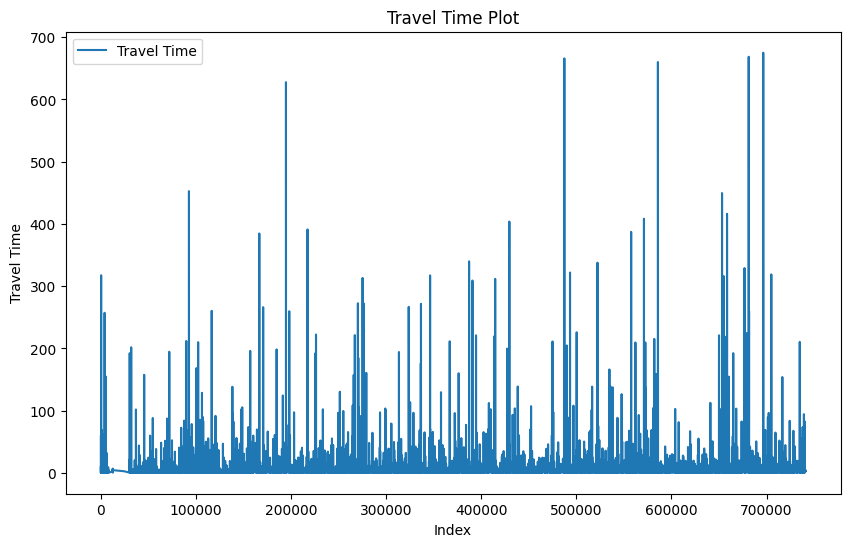

In [146]:
import matplotlib.pyplot as plt

# Plot the Travel_Time column
plt.figure(figsize=(10, 6))
plt.plot(data['Travel_Time'], label='Travel Time')
plt.xlabel('Index')
plt.ylabel('Travel Time')
plt.title('Travel Time Plot')
plt.legend()
plt.show()

In [147]:
data.size

421120